In [2]:
import requests
import pandas as pd

# locate your own client id and client secret at https://developer.spotify.com/dashboard/
CLIENT_ID = '' # Client ID
CLIENT_SECRET = '' # Client secret 
playlist_id = '5fu8CDQyQSx2dMyQpEnc7J'

# post request and save access token
auth_response = requests.post('https://accounts.spotify.com/api/token', 
    {'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET}).json()
access_token = auth_response['access_token']
print("access token" + access_token)
HEADERS = {'Authorization': 'Bearer {token}'.format(token=access_token)}

# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

def get_playlist_data(playlist_id):
    """ Given playlist_id, returns a pandas dataframe
        containing information on each track.
    """
    print("playlist id" + playlist_id)
    playlist_length = 50
    data = [] # will contain info about the tracks on the playlist
    counter = 0 # number of tracks appended to data

    while counter < playlist_length:
        limit = min(50, playlist_length-counter)
        print("counter at", counter)
        playlist = requests.get(BASE_URL + 'playlists/' + playlist_id + '/tracks',
                                headers=HEADERS,
                                params={'limit': limit, 'offset': counter}).json()
        if counter == 0:
            playlist_length = playlist['total']
        counter = min(counter+50, playlist_length) # update counter
    
        for item in playlist['items']:
            track_id = item['track']['id']
            # get each track's audio features
            audio = requests.get(BASE_URL + 'audio-features/' + track_id,
                                 headers=HEADERS).json()
            # get each track's name, artists, genres, popularity, explicit
            track = requests.get(BASE_URL + 'tracks/' + track_id,
                                 headers=HEADERS).json()
            artists = []
            genres = []
            for artist in track['artists']:
                artist_id = artist['id']
                artist_genres = requests.get(BASE_URL + 'artists/' + artist_id,
                                             headers=HEADERS).json()['genres']
                artists.append(artist['name'])
                genres.append(artist_genres)
            genres = [item for sublist in genres for item in sublist] # flatten
            # combine into one dictionary
            audio.update({
                'name': track['name'],
                'artists': artists,
                'genres': genres,
                'popularity': track['popularity'],
                'explicit': track['explicit']
            })
        
            data.append(audio)
    df = pd.DataFrame(data)
    # Set 'name' column as the index
    df.set_index('name', inplace=True)
    return df

# Call the function after HEADERS are defined
get_playlist_data(playlist_id)



access tokenBQCcDLTx9ebmEPpt9l1AIpCjVCVdzt1qQGCKy7i72L8DLWvWPrNQT0PK-lm9VS-7Qal5U8ptzfmO89FgqgSe_60-LbT0jgFQwad76iFNfXt-RVujoI4
playlist id5fu8CDQyQSx2dMyQpEnc7J
counter at 0


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,artists,genres,popularity,explicit
name,,,,,,,,,,,,,,,,,,,,,
highway 95,0.770,0.836,7,-5.322,1,0.0650,0.0548,0.000000,0.1430,0.425,...,2E4INiVkDRBXXkFL4kB1Vk,spotify:track:2E4INiVkDRBXXkFL4kB1Vk,https://api.spotify.com/v1/tracks/2E4INiVkDRBX...,https://api.spotify.com/v1/audio-analysis/2E4I...,91783,4,[Baby Keem],"[hip hop, rap]",74,True
Chrome Hearts,0.646,0.191,2,-14.375,1,0.0434,0.8640,0.000000,0.1140,0.448,...,6Crq3yX0pUdMaFAd3t60gH,spotify:track:6Crq3yX0pUdMaFAd3t60gH,https://api.spotify.com/v1/tracks/6Crq3yX0pUdM...,https://api.spotify.com/v1/audio-analysis/6Crq...,81584,4,[JON VINYL],[canadian contemporary r&b],58,False
No Better,0.608,0.665,5,-7.081,1,0.0664,0.1400,0.000001,0.3100,0.353,...,1cSO94kRdktvh9zbndRhFX,spotify:track:1cSO94kRdktvh9zbndRhFX,https://api.spotify.com/v1/tracks/1cSO94kRdktv...,https://api.spotify.com/v1/audio-analysis/1cSO...,170838,4,[Lorde],"[art pop, metropopolis, nz pop, pop]",55,False
Only When I Look into Your Eyes,0.725,0.694,10,-5.490,1,0.0390,0.0566,0.000045,0.4680,0.819,...,44kiDYXBx8Iju8iQPyldmO,spotify:track:44kiDYXBx8Iju8iQPyldmO,https://api.spotify.com/v1/tracks/44kiDYXBx8Ij...,https://api.spotify.com/v1/audio-analysis/44ki...,199167,4,[Fiji Blue],[chill pop],50,False
Marry You,0.621,0.820,10,-4.865,1,0.0367,0.3320,0.000000,0.1040,0.452,...,22PMfvdz35fFKYnJyMn077,spotify:track:22PMfvdz35fFKYnJyMn077,https://api.spotify.com/v1/tracks/22PMfvdz35fF...,https://api.spotify.com/v1/audio-analysis/22PM...,230192,4,[Bruno Mars],"[dance pop, pop]",78,False
Swan Song,0.714,0.587,5,-5.124,0,0.0401,0.0378,0.000000,0.1670,0.542,...,790TzR1UxBXVMFSGq8p7bv,spotify:track:790TzR1UxBXVMFSGq8p7bv,https://api.spotify.com/v1/tracks/790TzR1UxBXV...,https://api.spotify.com/v1/audio-analysis/790T...,167587,4,"[Saweetie, NIKI]","[cali rap, trap queen, indonesian r&b]",49,False
Candy,0.689,0.516,8,-5.857,1,0.0444,0.5130,0.000000,0.1630,0.209,...,1VJwtWR6z7SpZRwipI12be,spotify:track:1VJwtWR6z7SpZRwipI12be,https://api.spotify.com/v1/tracks/1VJwtWR6z7Sp...,https://api.spotify.com/v1/audio-analysis/1VJw...,190920,4,[Doja Cat],"[dance pop, pop]",74,True
Right Down the Line,0.783,0.322,0,-15.091,1,0.0343,0.2130,0.002430,0.1140,0.770,...,2Xb6wJYGi0QXwURw5WWvI5,spotify:track:2Xb6wJYGi0QXwURw5WWvI5,https://api.spotify.com/v1/tracks/2Xb6wJYGi0QX...,https://api.spotify.com/v1/audio-analysis/2Xb6...,267773,4,[Gerry Rafferty],"[art rock, classic rock, folk rock, mellow gol...",74,False
Loving You,0.708,0.746,3,-6.010,1,0.0565,0.0408,0.001780,0.0815,0.672,...,5m5THqRa6jHwKYLMWp2DEW,spotify:track:5m5THqRa6jHwKYLMWp2DEW,https://api.spotify.com/v1/tracks/5m5THqRa6jHw...,https://api.spotify.com/v1/audio-analysis/5m5T...,194595,4,[Cannons],[chillwave],63,False


In [9]:
def get_song_info(df, song_name, info_key, key_mapping):
    """
    Given a DataFrame, song name, key mapping, and desired information key,
    this function returns key signature for a given song.
    """
    try:
        song_info = df.loc[song_name][info_key]
        return song_info
    except KeyError:
        print(f"Song '{song_name}' not found in the playlist.")
        return None

# Call the function after HEADERS are defined and the playlist data is obtained
playlist_df = get_playlist_data(playlist_id)

# Define the key mapping, Numbers correspond to key signatures. 
key_mapping = {
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B',
}

# Get the key of your favorite song
song_name = "highway 95"
info_key = "key"
song_key = get_song_info(playlist_df, song_name, info_key, key_mapping)

if song_key is not None:
    music_key = key_mapping.get(song_key, 'Note')
    print(f"The key of '{song_name}' is {music_key}.") # doesn't say major or minor? 


playlist id5fu8CDQyQSx2dMyQpEnc7J
counter at 0
The key of 'highway 95' is G.


In [12]:
 # grab the most dance-able song in your playlist! 
    
# Sort the DataFrame by danceability in descending order
sorted_playlist = playlist_df.sort_values(by='danceability', ascending=False)

# Get the most danceable song
most_danceable_song = sorted_playlist.head(1).reset_index()

# Print information about the most danceable song
print("Most Danceable Song:")
print(most_danceable_song[[ 'name', 'danceability']])

Most Danceable Song:
              name  danceability
0  Pictures of You         0.925


playlist id5fu8CDQyQSx2dMyQpEnc7J
counter at 0


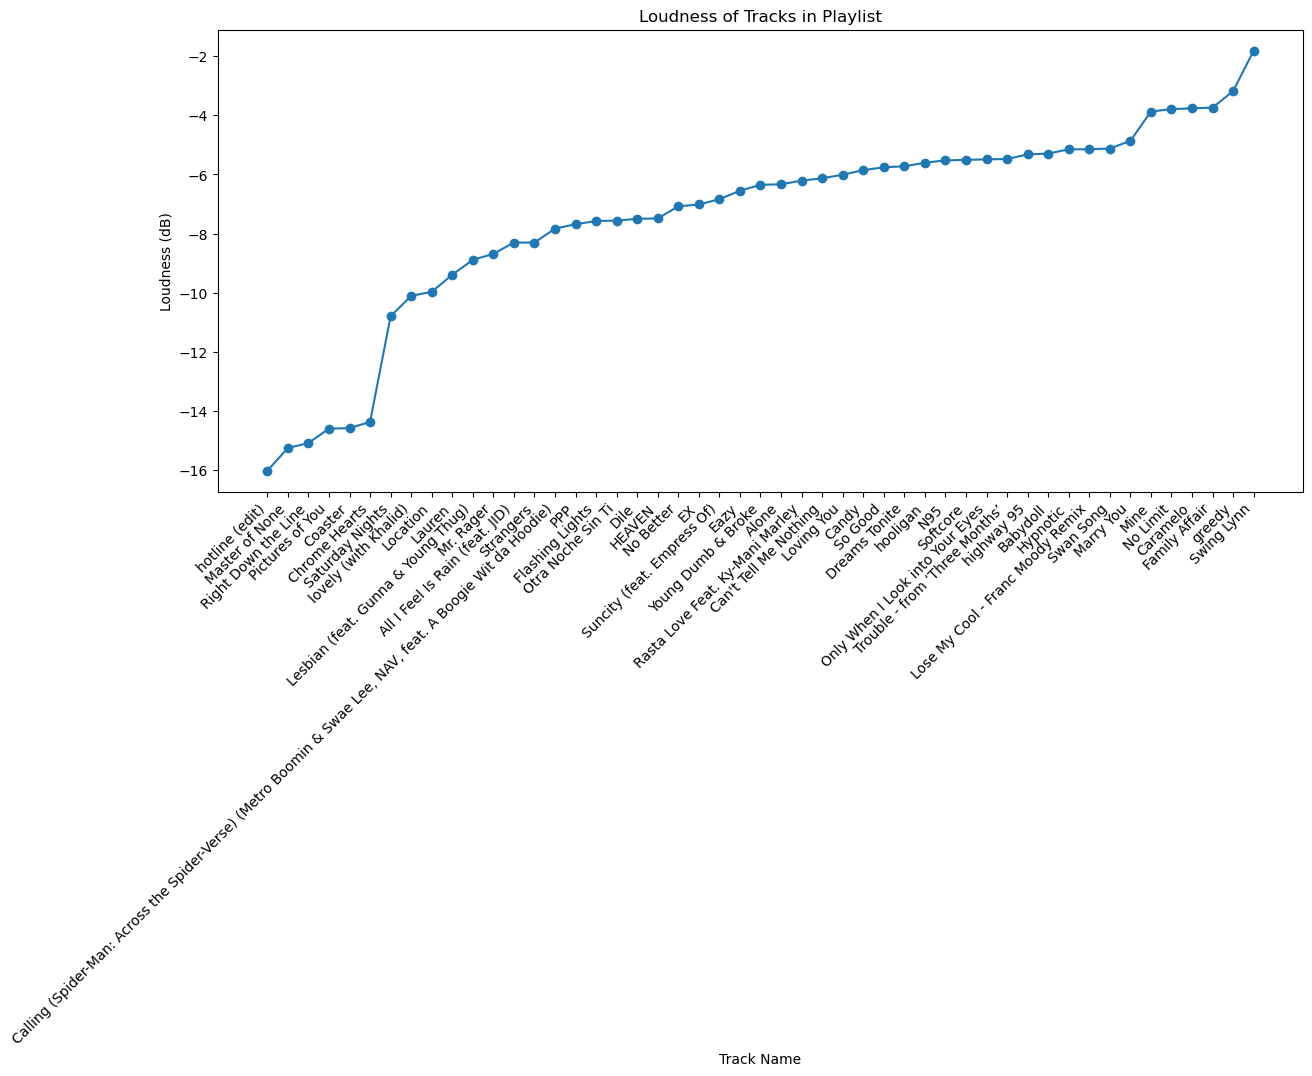

In [18]:
import matplotlib.pyplot as plt

# Obtain the playlist data using the get_playlist_data function
playlist_df = get_playlist_data(playlist_id)

# Sort the DataFrame by loudness in ascending order
sorted_playlist = playlist_df.sort_values(by='loudness')

# Specify size
plt.figure(figsize=(14, 6))

# Create a line plot of loudness values
plt.plot(sorted_playlist['loudness'], marker='o', linestyle='-') # o, shape of marker, - line connecting 

# title
plt.title('Loudness of Tracks in Playlist')

# Label the x-axis with track names
plt.xlabel('Track Name')

# Label the y-axis with loudness from playlist 
plt.ylabel('Loudness (dB)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()
